<a href="https://colab.research.google.com/github/CodeWithSridhar/Movies-Recommender-system/blob/main/Movie_Recommendation_System_Sri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  🎥 ***Movies Recommender System***🎥 

**About the Dataset**:🎬

The dataset consists of  metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.


**Dataset:📂**

https://www.kaggle.com/rounakbanik/movie-recommender-systems/data

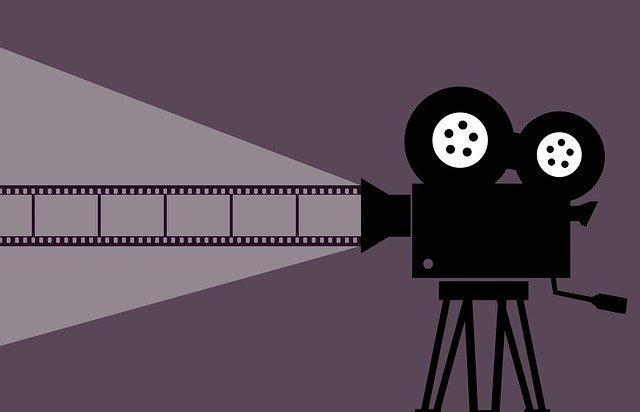

**Dataset Description**: 📝

This dataset consists of the following files:

⚡ **movies_metadata.csv**: 

The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

⚡ **keywords.csv**:

 Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.


⚡ **credits.csv**: 

Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.


⚡ **links.csv**: 

The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

⚡ **links_small.csv**: 

Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.


⚡ **ratings_small.csv**: 

The subset of 100,000 ratings from 700 users on 9,000 movies.

# Problem Statement:❓
Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
1. Popularity based recommender system
2. Content based Recommender System
3. Collaborative Recommender System

In [1]:
#importing necessary modules

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading data
path = '/content/drive/MyDrive/Innomatics Research Labs/Movier_Recommendation_System_Final_Project/'

### **Movies Dataset**

In [4]:
movies = pd.read_csv(path+'movies_metadata.csv', sep=',', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies = pd.read_csv(path+'movies_metadata.csv', sep=',', encoding='latin-1')

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [19]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [20]:
movies.shape

(45466, 24)

In [21]:
movies.isnull()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
45462,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
45463,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45464,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [22]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### **Credits** **Dataset**

In [5]:
credits = pd.read_csv(path+'credits.csv', sep=',', encoding='latin-1')

In [6]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [14]:
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [15]:
credits.shape

(45476, 3)

In [16]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [18]:
credits.isnull()

,cast,crew,id
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
45471,False,False,False
45472,False,False,False
45473,False,False,False
45474,False,False,False


In [17]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

### **Keywords**

In [7]:
keywords = pd.read_csv(path+'keywords.csv', sep=',', encoding='latin-1')

In [12]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [24]:
keywords.columns

Index(['id', 'keywords'], dtype='object')

In [25]:
keywords.shape

(46419, 2)

In [26]:
keywords.isnull()

,id,keywords
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
46414,False,False
46415,False,False
46416,False,False
46417,False,False


In [27]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

### **Links**

In [36]:
links  = pd.read_csv(path+'links.csv', sep=',', encoding='latin-1')

In [37]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [40]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [41]:
links.shape

(45843, 3)

In [42]:
links.isnull()

,movieId,imdbId,tmdbId
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
45838,False,False,False
45839,False,False,False
45840,False,False,False
45841,False,False,False


In [43]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

### **Links_Small**

In [8]:
links_small = pd.read_csv(path+'links_small.csv', sep=',', encoding='latin-1')

In [13]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [28]:
links_small.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [29]:
links_small.shape

(9125, 3)

In [30]:
links_small.isnull()

,movieId,imdbId,tmdbId
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9120,False,False,False
9121,False,False,False
9122,False,False,False
9123,False,False,False


In [31]:
links_small.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

### **Ratings_small**

In [10]:
ratings_small  = pd.read_csv(path+'ratings_small.csv', sep=',', encoding='latin-1')

In [11]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [32]:
ratings_small.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [33]:
ratings_small.shape

(100004, 4)

In [34]:
ratings_small.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99999,False,False,False,False
100000,False,False,False,False
100001,False,False,False,False
100002,False,False,False,False


In [35]:
ratings_small.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [44]:
movies.iloc[0:3].transpose()

,0,1,2
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


## **Attributes of Movies Dataset**:

    adult: Indicates if the movie is X-Rated or Adult.
    belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
    budget: The budget of the movie in dollars.
    genres: A stringified list of dictionaries that list out all the genres associated with the movie.
    homepage: The Official Homepage of the move.
    id: The ID of the move.
    imdb_id: The IMDB ID of the movie.
    original_language: The language in which the movie was originally shot in.
    original_title: The original title of the movie.
    overview: A brief blurb of the movie.
    popularity: The Popularity Score assigned by TMDB.
    poster_path: The URL of the poster image.
    production_companies: A stringified list of production companies involved with the making of the movie.
    production_countries: A stringified list of countries where the movie was shot/produced in.
    release_date: Theatrical Release Date of the movie.
    revenue: The total revenue of the movie in dollars.
    runtime: The runtime of the movie in minutes.
    spoken_languages: A stringified list of spoken languages in the film.
    status: The status of the movie (Released, To Be Released, Announced, etc.)
    tagline: The tagline of the movie.
    title: The Official Title of the movie.
    video: Indicates if there is a video present of the movie with TMDB.
    vote_average: The average rating of the movie.
    vote_count: The number of votes by users, as counted by TMDB.

In [45]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

☘ Total ***movies*** present in the dataset: ***45466***

☘ Total Attributes: **24**

☘ Nan-values are present in the dataset

In [46]:
movies = movies.drop(['imdb_id','original_title'], axis=1)

In [47]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
